# Assignment 1

## Part 1: Temporal evolution of focus crimes (From Week 2)
Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
#import seaborn as sns
%matplotlib inline
from folium.plugins import HeatMap
import os
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import random

In [2]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [3]:
# Loading the crime data
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [4]:
#convering the date in the dataframe into a datetime
data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%Y")

In [5]:
# Adding a new column that tells which year each crime has done.
date_time_list = []

for ts in data['Date']:
    date_time_list.append(ts.year)

data['Year'] = date_time_list

In [6]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000,2015
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074,2015
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014,2015
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200,2015
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160,2015


In [7]:
# making a dataframe, where we only look at from year 2003 to year 2017
data_crime_year = data[(data['Year'] >= 2003) & (data['Year'] <= 2017)]

In [8]:
data_crime_year.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000,2015
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074,2015
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014,2015
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200,2015
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160,2015


In [9]:
# grouping the categories and years, and then see how many crimes for each categires happens over the time (2003-2017)
crime_year = data_crime_year.groupby(['Category','Year']).size()

In [10]:
crime_year

Category     Year
ARSON        2003      293
             2004      280
             2005      231
             2006      240
             2007      246
             2008      248
             2009      222
             2010      209
             2011      203
             2012      237
             2013      248
             2014      253
             2015      311
             2016      286
             2017      327
ASSAULT      2003    13461
             2004    12899
             2005    11601
             2006    12449
             2007    12518
             2008    12681
             2009    12284
             2010    12387
             2011    12279
             2012    12181
             2013    12580
             2014    12402
             2015    13115
             2016    13603
             2017    13655
                     ...  
WARRANTS     2003     9079
             2004     8114
             2005     6708
             2006     6498
             2007     7105
          

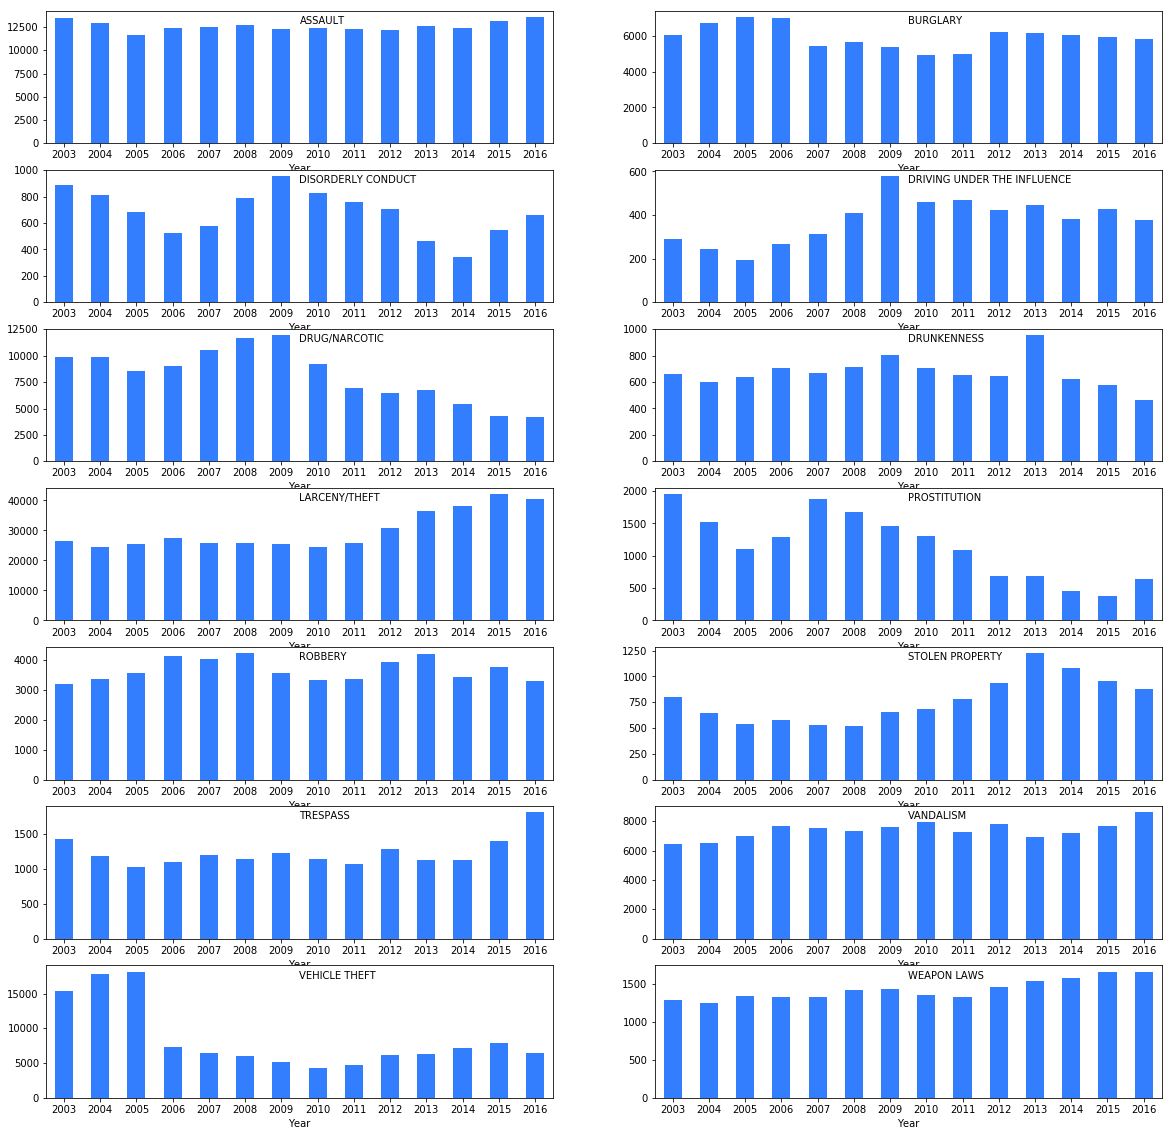

In [11]:
# the size of the figures
plt.rcParams['figure.figsize'] = (20,20) 

# converting the focuscrime into a list
focuscrime_list = sorted(list(focuscrimes))

# Go through a for-loop for making bar-charts for each focus crime and plot it out
for item in range(0, len(focuscrime_list)):
    k = crime_year[focuscrime_list[item]]
    kk = k[:-1]
    ax = plt.subplot(7,2,item+1)
    kk.plot.bar(color="#337DFF")
    ax.text(.5,.9,focuscrime_list[item],
        horizontalalignment='left',
        transform=ax.transAxes)
    plt.xticks(rotation="horizontal")

## Part 2: Visualizing geo-data (From Week 2)

*Exercise: A bit a plotting*

- Select a couple of months of data (for example, June-July 2016) for 'DRUG/NARCOTIC' and the same couple of month for 'LARCENY/THEFT'. Note: There is an issue with folium and plotting lots of points, so if you have trouble plotting simply select a shorter time period; you should be able to plot a couple of thousand points.


In [12]:
drug_narc = data[(data['Date'] >= '2016-06-01') & (data['Date'] <= '2016-07-31') & (data['Category'] == 'DRUG/NARCOTIC')]

theft_larc = data[(data['Date'] >= '2016-06-01') & (data['Date'] <= '2016-07-31') & (data['Category'] == 'LARCENY/THEFT')]

- Draw a little circle for each arrest in the category 'DRUG/NARCOTIC' for your time period. We can call this a kind of visualization a scatter plot

In [13]:
# Map for for San Francisco - for DRUG/NARCOTIC
lat = 37.77919
lon = -122.41914

ma1 = folium.Map([lat, lon], zoom_start=13)

In [14]:
# Looping through all points and plot each crime arrest on the map - for DRUG/NARCOTIC
for index, row in drug_narc.iterrows():
    folium.CircleMarker([row['Y'], row['X']],
                        radius=7,
                        popup=row['Address'],
                        fill_color="#3db7e4", 
                       ).add_to(ma1)
#show the map with the plot
ma1

- Draw a little circle for each arrest in the category 'LARCENY/THEFT' for the time period.
    
    
- Because there is 6774 crime arrest for LARCENY/THEFT, we are not able to plot all of them on the map. Therefore, we will only take the first 1300 arrest to plot the points on the map.

In [15]:
new_theft_larc = theft_larc[0:1300]

In [16]:
# Map for for San Francisco - for LARCENY/THEFT
lat = 37.77919
lon = -122.41914

ma2 = folium.Map([lat, lon], zoom_start=13)

In [17]:
# Looping through all points and plot each crime arrest on the map - for LARCENY/THEFT
for index, row in new_theft_larc.iterrows():
    folium.CircleMarker([row['Y'], row['X']],
                        radius=7,
                        popup=row['Address'],
                        fill_color="#3db7e4", 
                       ).add_to(ma2)
#show the map with the plot
ma2

Now, let's play with heatmaps.

- Create a heatmap of all arrests for 'DRUG/NARCOTIC' during June-July 2016 (with the heatmap you should be able to use the full period). Play with parameters to get plots you like


In [18]:
# Map over San Francisco - For DRUG/NARCOTIC
lat = 37.77919
lon = -122.41914

maap1 = folium.Map([lat, lon], zoom_start=13)

In [19]:
# Creating the heat map - For DRUG/NARCOTIC
heat_data = [[row['Y'],row['X']] for index, row in drug_narc.iterrows()]

# Plot it on the map
HeatMap(heat_data, min_opacity=0.5, max_zoom=18, blur=15, gradient=None).add_to(maap1)

maap1

- Create a heatmap of all arrests for 'LARCENY/THEFT' during June-July 2016 (with the heatmap you should be able to use the full period).

In [20]:
# Map over San Francisco - For LARCENY/THEFT
lat = 37.77919
lon = -122.41914

maap2 = folium.Map([lat, lon], zoom_start=13)

In [21]:
# Creating the heat map - For LARCENY/THEFT with all 6774 crime arrest
heat_data = [[row['Y'],row['X']] for index, row in theft_larc.iterrows()]

# Plot it on the map
#HeatMap(heat_data, min_opacity=0.5, max_zoom=7, max_val=1.0, radius=12, blur=7, gradient=None, overlay=True, control=True, show=True).add_to(maap2)
HeatMap(heat_data, min_opacity=0.5, max_zoom=18, blur=15, gradient=None).add_to(maap2)
maap2

Comment on the differences:

What can you see using the scatter-plots that you can't see using the heatmaps? 
- In the scatter-plots, it's easier to see each individuel crimes on the map.

And vice versa: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?
- The heatmaps show more about in which area this crime is more active than other places on the map.

Comment on the effect on the various parameters for the heatmaps. How do they change the picture?
- If you change the minimum opacity on the heatmap to be a higher value, the red color can be more intens and fill out more in the heatmap, which it's not good because then you can't actually see which area is more active than other. 
- The higher the value of the blur is, the more blurry and invisible the red color would be on the map.
- By changing the max_zoom value to be lower, the intensity of each point will get be more intens, as more red, and be zooming in, the intensity would still be high for each points. Vise versa when the value is higher.
- You can even change the gradient, if you want different color other than the default heatmap color.

## Part 3: Some single variable plots (From Week 3)

*Excercise:* Connecting the dots and recreating plots from DAOST but using our own favorite dataset.

- First create a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (e.g. 13-14).

In [22]:
drug_narc_jit = data[(data['Date'] >= '2016-06-01') & (data['Date'] <= '2016-10-31') & (data['Category'] == 'DRUG/NARCOTIC') & (data['Time'] >= '13:00') & (data['Time'] <= '13:59')]

In [23]:
drug_narc_jit["minutes"]= drug_narc_jit.Time.str.slice(3,5).astype(int)

C:\Users\LenovoPC1\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
to_plot = drug_narc_jit.groupby("minutes").count().reset_index()[["minutes","Category"]].values.tolist()

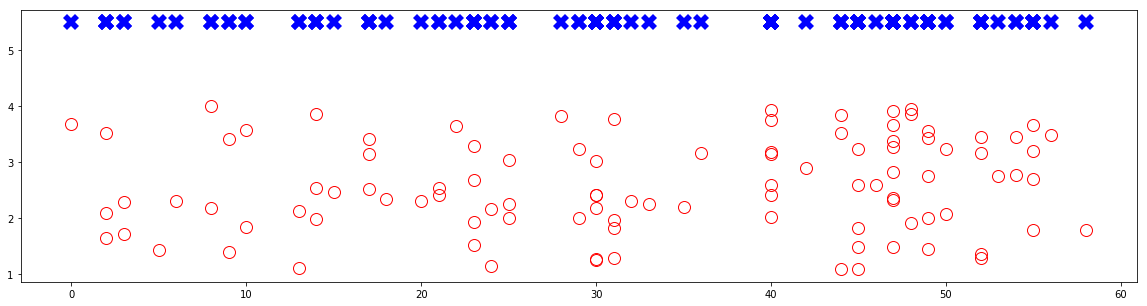

In [25]:
# Create figure (plt.figure....)
# for through to_plot points 
# generate randomly the y coordinates
# plot each pair with simple matplotlib plot
plt.rcParams['figure.figsize'] = (20,5)
plt.figure(1)
for pair in to_plot:
    minute = pair[0]
    yRandom = np.random.uniform(low=1, high=4, size=(pair[1],))
    for p in range(pair[1]):
        plt.plot(minute, yRandom[p], 'ro', markersize=12, mfc='none')
        plt.plot(minute, 5.5, 'bX', markersize=16, markeredgewidth=0.001)
plt.show()

Now it's time for histograms. We will now create two versions of Figure 2-2.
- Pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)

In [26]:
forgData = data[(data['Category'] == ('FORGERY/COUNTERFEITING')) ]
proData =data[(data['Category'] == ('PROSTITUTION')) & (data['Y'] <= 40)]
forgProData = forgData.append(proData)

- Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram -- that gives you the counts and then you do your own plotting.

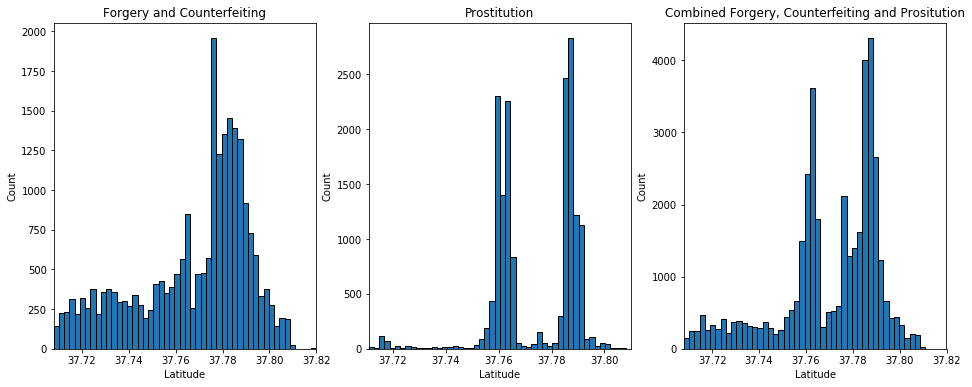

In [27]:
fig = plt.figure(figsize=(16,6))
ax1 = plt.subplot(131)

forgHist, forgEdges = np.histogram(forgData["Y"], bins = 50)
plt.bar(forgEdges[:-1], forgHist, width=np.diff(forgEdges), ec="k", align="edge")
plt.xlim(min(forgEdges), max(forgEdges))
plt.title("Forgery and Counterfeiting")
plt.xlabel('Latitude')
plt.ylabel('Count')


ax1 = plt.subplot(132)
proHist, proEdges = np.histogram(proData["Y"], bins = 50)
plt.bar(proEdges[:-1], proHist, width=np.diff(proEdges), ec="k", align="edge")
plt.xlim(min(proEdges), max(proEdges))
plt.title("Prostitution")
plt.xlabel('Latitude')
plt.ylabel('Count')

ax1 = plt.subplot(133)

forgProHist, forgProEdges = np.histogram(forgProData["Y"], bins = 50)
plt.bar(forgProEdges[:-1], forgProHist, width=np.diff(forgProEdges), ec="k", align="edge")
plt.xlim(min(forgProEdges), max(forgProEdges))
plt.title("Combined Forgery, Counterfeiting and Prositution")
plt.xlabel('Latitude')
plt.ylabel('Count')
plt.show() 

Next up is recreating Figure 2-4 from DAOST, but with the data you used to create Figure 211. To create the kernel density plot, you can either use gaussian_kde from scipy.stats (for an example, check out this stackoverflow post) or you can use seaborn.kdeplot.

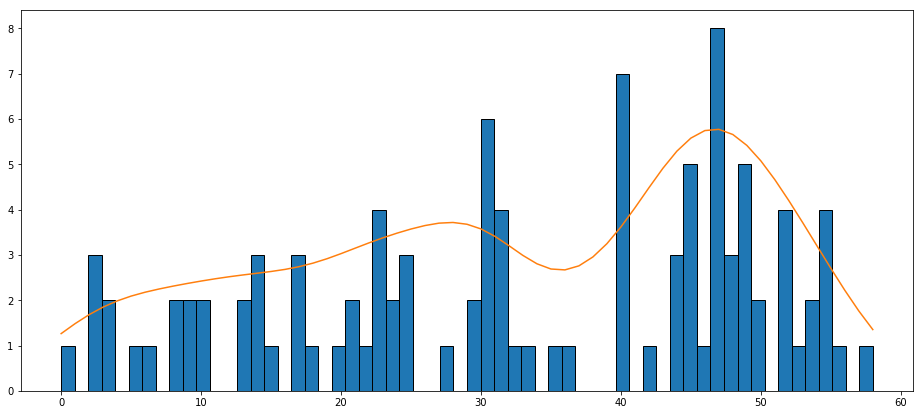

In [28]:
from scipy.stats import gaussian_kde
densityArray = []
fig = plt.figure(figsize=(16,7))
for pair in to_plot:
    for c in range(pair[1]):
        densityArray.append(pair[0])
density = gaussian_kde(densityArray)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.hist(densityArray, ec="k", bins = 60)
plt.plot(density(np.linspace(0,59,59))* 200) #the 200 multiplier on the density is to put it on top of the histogram
plt.show()

Now grab 25 random timepoints from the dataset you've just plotted and create the same Figure 2-4 plot once again, but with fewer points.

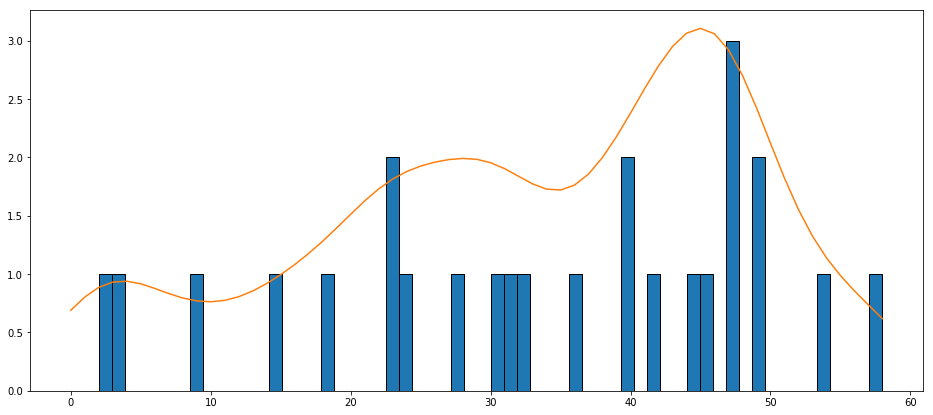

In [29]:
import random

fig = plt.figure(figsize=(16,7))
randomArray = random.sample(densityArray, 25)
density = gaussian_kde(randomArray)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.hist(randomArray, ec="k", bins = 60)
plt.plot(density(np.linspace(0,59,59))* 100) 
plt.show()

 Does this shed light on why I think KDEs can bee misleading?

Answer: When the density of the data set is low, the KDE can be highly inaccurate, which is seen when comparing the original dataset to the the smaller 25 datapoint set.

Create your own two versions of Figure 2-11, but using the GPS data you used for your version of Figure 2-2. 

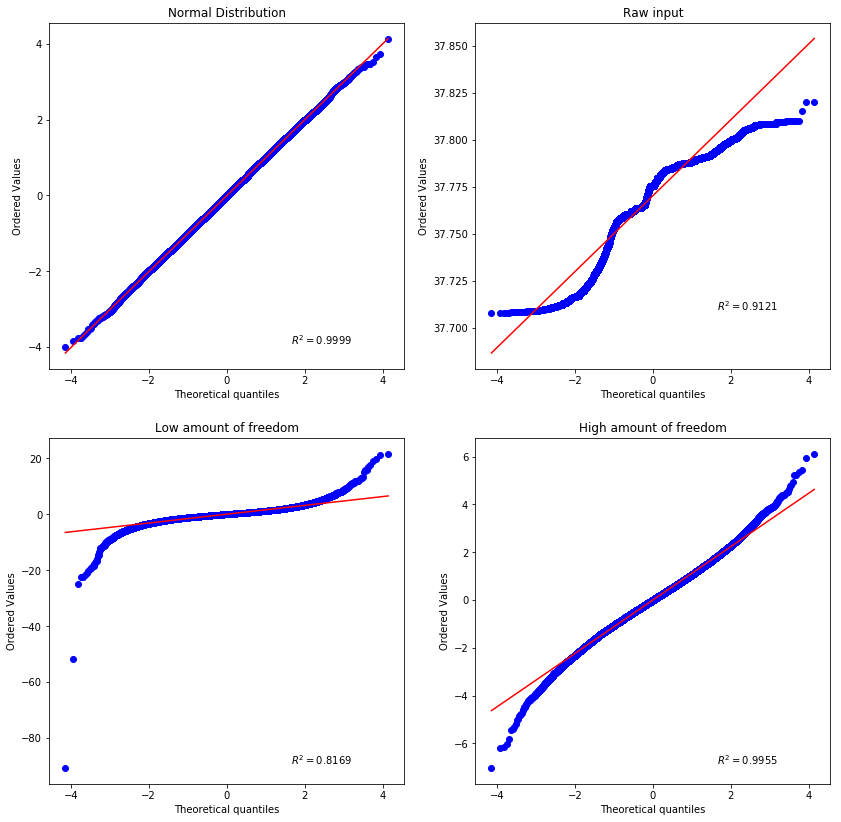

In [30]:
#Low and high freedom. Normal distribution and Raw input for comparison

from scipy import stats
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(221)
x = stats.norm.rvs(loc=0, scale=1, size=len(forgProData["Y"]))
res = stats.probplot(x, plot=plt, rvalue = True)
ax1.set_title("Normal Distribution")

ax1 = plt.subplot(222)
x = stats.probplot(forgProData["Y"], plot=plt, rvalue=True)
ax1.set_title("Raw input")


ax1 = plt.subplot(223)
x = stats.t.rvs(3, size=len(forgProData["Y"]))
res = stats.probplot(x, plot=plt, rvalue=True)
ax1.set_title("Low amount of freedom")

ax1 = plt.subplot(224)
x = stats.t.rvs(10, size=len(forgProData["Y"]))
res = stats.probplot(x, plot=plt, rvalue=True)
ax1.set_title("High amount of freedom")

plt.show()

Comment on the result. It is not easy to create this plot from scracth, bHint: Take a look at the scipy.stats.probplot function.

Once you allow a high amount of freedom for the probrability plot you will end up with a high R^2 value (almost as high as the normal distribution) compared to the low freedom plot, which got even worse than our raw data input

Now box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. For the 15 focus crimes defined last week.
- For the full time-span of the data, calulate the number of crimes per day within each category for the entire duration of the data (this should result in 15 datasets, on for each focus crime).

- Create a box-and whiskers plot showing the mean, median, quantiles, etc for each of the 15 crime-types and show them side-by-side. There are many ways to do this, I like to use matplotlibs's built in functionality

- What does this plot reveal that you can't see in the plots from last time?
    - (skriv noget her)

## Part 4: Decision tree (From Week 4)

*Exercise: Decision trees and real-world crime data*

The idea for this exercise is to pick two crime-types that have different geographical patterns and different temporal patterns. We can then use various variables of the real crime data as categories to build a decision tree. I'm thinking we can use

- DayOfWeek (Sunday, ..., Saturday). (Note: Will need to be encodede as integer in sklearn)
- PD District (TENDERLOIN, etc). (Note: Will need to be encodede as integer in sklearn)

And we can extract a few more from the Time and Date variables

- Hour of the day (1-24)
- Month of the year (1-12)

So your job is to **select two crime categories** that (based on your analyses from the past three weeks) have different spatio-temporal patterns. Then we are going to to build is a decision tree (or a random forest) that takes as input the four labels (Hour-of-the-day, Day-of-the-week, Month-of-the-year, and PD-District) of some crime (from one of the two categories) and then tries to predict which category that crime is from.

Some notes/hints

- It is important for your success here to create a balanced dataset, that is, **grab an equal number of examples** from each of the two crime categories. Pick categories with lots of training data. It's probably nice to have something like 10000+ examples of each category to train on.
- Also, I recommend you grab your training data at random from the set of all examples, since we want crimes to be distributed equally over time.
- A good option is the DecisionTreeClassifier.


Categorizing dataset 

In [31]:
category = data.groupby(['Category']).size()
crime = data[['Category','DayOfWeek','PdDistrict','Time','Date']]

Isolating the dataframe for one specific crime

In [32]:
idx1 = crime[crime['Category']=='FORGERY/COUNTERFEITING'].index.values.astype(int)
crime1_data = crime.iloc[idx1,:]

In [33]:
idx2 = crime[crime['Category']=='PROSTITUTION'].index.values.astype(int)
crime2_data = crime.iloc[idx2,:]

Randomizing the examples drawn from training set

In [34]:
num_examples = 15000;
idx_rand = random.sample(range(len(crime1_data)), num_examples)
crime1 = crime1_data.iloc[idx_rand,:]

In [35]:
idx_rand = random.sample(range(len(crime2_data)), num_examples)
crime2 = crime2_data.iloc[idx_rand,:]

Getting a list of hours

In [36]:
time1 = pd.to_datetime(crime1['Time'], format="%H:%M")
list_hour_1 = []
for ts in time1:
    list_hour_1.append(ts.hour)

list_hour_1;

In [37]:
time2 = pd.to_datetime(crime2['Time'], format="%H:%M")
list_hour_2 = []
for ts in time2:
    list_hour_2.append(ts.hour)

list_hour_2;

Getting list of month of the year

In [38]:
month1 = pd.to_datetime(crime1['Date'], format="%m/%d/%Y")
list_month_1 = []
for ts in month1:
    list_month_1.append(ts.month)

list_month_1;

In [39]:
month2 = pd.to_datetime(crime2['Date'], format="%m/%d/%Y")
list_month_2 = []
for ts in month2:
    list_month_2.append(ts.month)

list_month_2;

Getting list of day of week

In [40]:
import time
k = crime1['DayOfWeek']
dayOfWeek = k.values
list_dayOfWeek_1 = []
for ts in range(len(dayOfWeek)):
    weekday_as_int = time.strptime(dayOfWeek[ts], "%A").tm_wday
    list_dayOfWeek_1.append(weekday_as_int)
    
list_dayOfWeek_1;  

In [41]:
k = crime2['DayOfWeek']
dayOfWeek = k.values
list_dayOfWeek_2 = []
for ts in range(len(dayOfWeek)):
    weekday_as_int = time.strptime(dayOfWeek[ts], "%A").tm_wday
    list_dayOfWeek_2.append(weekday_as_int)
    
list_dayOfWeek_2;  

Getting list of pdDistrict

In [42]:
pdd = crime1['PdDistrict']
pdd = pdd.values
list_pdd_1 = [0 if x=='BAYVIEW' else 1 if x=='CENTRAL' else 2 if x=='INGLESIDE' else 3 if x=='MISSION' else 4 if x=='NORTHERN'\
 else 5 if x=='PARK' else 6 if x=='RICHMOND' else 7 if x=='SOUTHERN' else 8 if x=='TARAVAL' else 9 if x=='TENDERLOIN' else x for x in pdd]


In [43]:
pdd = crime2['PdDistrict']
pdd = pdd.values
list_pdd_2 = [0 if x=='BAYVIEW' else 1 if x=='CENTRAL' else 2 if x=='INGLESIDE' else 3 if x=='MISSION' else 4 if x=='NORTHERN'\
 else 5 if x=='PARK' else 6 if x=='RICHMOND' else 7 if x=='SOUTHERN' else 8 if x=='TARAVAL' else 9 if x=='TENDERLOIN' else x for x in pdd]


From list to arrays 

In [44]:
pdd_ar_1 = np.array(list_pdd_1, ndmin=1)
dayOfWeek_ar_1 = np.array(list_dayOfWeek_1, ndmin=1)
hour_ar_1 = np.array(list_hour_1, ndmin=1)
month_ar_1 = np.array(list_month_1, ndmin=1)

In [45]:
pdd_ar_2 = np.array(list_pdd_2, ndmin=1)
dayOfWeek_ar_2 = np.array(list_dayOfWeek_2, ndmin=1)
hour_ar_2 = np.array(list_hour_2, ndmin=1)
month_ar_2 = np.array(list_month_2, ndmin=1)

Concatinating arrays to one feature matrix

In [46]:
fm_a = np.vstack((hour_ar_1,dayOfWeek_ar_1 ))
fm_b = np.vstack((month_ar_1, pdd_ar_1))

fm1 = np.vstack((fm_a,fm_b))
fm1 = fm1.transpose()

In [47]:
fm_a = np.vstack((hour_ar_2, dayOfWeek_ar_2))
fm_b = np.vstack((month_ar_2, pdd_ar_2))

fm2 = np.vstack((fm_a,fm_b))
fm2 = fm2.transpose()

Concatinating the 2 featurematrices

In [48]:
fm = np.vstack((fm1,fm2))
# hour dayOfWeek month pdDistrict 

Defining the y-vector

In [49]:
y1 = np.ones(len(crime1))
y2 = np.ones(len(crime2))*0
y = np.hstack((y1,y2))
y =y.reshape(-1,1)

Randomizing the trainingset order

In [50]:
fmy = np.hstack((fm,y))  # combining feature matrix and y vector 
np.random.shuffle(fmy)   # randomizing roworder i.e the order of the training samples

Running it through classifier 

In [51]:
clf = DecisionTreeClassifier(random_state = 0,min_samples_split=20)
# a minimum split size of 100 seems to give better test_accuracy

training_size = num_examples- 5000;  # Dividing the data in test set and training set 
fea_m = fmy[0:training_size,0:4]
y_vec =  fmy[0:training_size,4]


clf = clf.fit(fea_m,y_vec)
cross_val_score(clf, fea_m,y_vec, cv=10); # used in case of cross validation

Testing

In [52]:
fea_m_test = fmy[training_size:-1,0:4]
y_vec_test =  fmy[training_size:-1,4]

y_pred = clf.predict(fea_m_test);

Test accuracy

In [53]:
test_total= y_pred == y_vec_test

test_accuracy = np.sum(test_total);

test_accuracy_percent = test_accuracy/len(test_total)*100
test_accuracy_percent

83.07415370768538

- Since you have created a balanced dataset, the baseline performance (random guess) is 50%. How good can your classifier get?
    - The best this classifier can do is around 83 percent